In [8]:
import numpy as np
import pandas as pd
import seqlogo

In [9]:
data = pd.read_csv("PCC6803 Promoter and reads 100bp.csv")
sequences = data['Promoter']
sequences

0       CACCTCCAAATTATCTAAGTTAGCCAAATACCAAGAAGATTGGGCA...
1       TTTTGGGGAAACCGGCCGGGTCAGATTTAATCAGCGGCAACATCAC...
2       CCAAACGATGCTGAAGTTTACCGTTGCTGGTGAGCAGCAATAGTCC...
3       CAGCAACTCTTAACGGGAAATCCCAATGGTCCCTGGCAGAAAAAAT...
4       CCTGAATATCTCCAGGGTTATACCGCCCCCGATGAAGCTTTTGTTT...
                              ...                        
3707    GAACCAAGTCGATTTGGGTTTATGAAAGCCAGAGGACAGGGCGGGG...
3708    ACAACGTTGATCTACGGGCCGTTTATCGCAAGCTTGGCGATCGTCG...
3709    TGCTTAGTTGAATTAGCTATAAACTAAATCAGTCAATTAGTCAGCT...
3710    GGGGGCAAACAGGGAGGTAGTGGAGATCATCGGCTGGCCAAACTTG...
3711    GGCATCAGCGCAAAAGTAGAACAAAGTTCAGTCAAGGGCGGCGATC...
Name: Promoter, Length: 3712, dtype: object

In [10]:
from collections import Counter
pfm = pd.DataFrame([Counter(seq) for seq in sequences]).fillna(0)

# Convert PFM to PWM
pwm = seqlogo.pfm2pwm(pfm.values)
print(pwm)
pwm.to_numpy()

                 A             C             G         T
0     2.141248e-01  5.655972e-01 -3.219281e-01 -0.836501
1     5.658353e-02  1.634987e-01  5.770782e-10 -0.251539
2    -5.889369e-02  2.630344e-01  5.658353e-02 -0.321928
3     2.141248e-01  2.630344e-01 -3.959287e-01 -0.184425
4     5.770782e-10  5.770782e-10  2.141248e-01 -0.251539
...            ...           ...           ...       ...
3707 -4.739312e-01  2.141248e-01 -3.959287e-01  0.443607
3708  1.110313e-01  5.770782e-10 -1.844246e-01  0.056584
3709 -1.058894e+00  4.005379e-01  6.040713e-01 -0.556393
3710 -6.438562e-01  1.634987e-01  1.634987e-01  0.163499
3711 -2.515388e-01  6.040713e-01 -2.515388e-01 -0.321928

[3712 rows x 4 columns]


array([[ 2.14124806e-01,  5.65597176e-01, -3.21928094e-01,
        -8.36501267e-01],
       [ 5.65835289e-02,  1.63498733e-01,  5.77078163e-10,
        -2.51538766e-01],
       [-5.88936885e-02,  2.63034406e-01,  5.65835289e-02,
        -3.21928094e-01],
       ...,
       [-1.05889369e+00,  4.00537930e-01,  6.04071324e-01,
        -5.56393348e-01],
       [-6.43856189e-01,  1.63498733e-01,  1.63498733e-01,
         1.63498733e-01],
       [-2.51538766e-01,  6.04071324e-01, -2.51538766e-01,
        -3.21928094e-01]])

In [11]:
pfm

,C,A,T,G
0,29,37,20,14
1,26,28,25,21
2,24,30,26,20
3,29,30,19,22
4,25,25,29,21
...,...,...,...,...
3707,18,29,19,34
3708,27,25,22,26
3709,12,33,38,17
3710,16,28,28,28


In [14]:
pfm.T

,0,1,2,3,4,5,6,7,8,9,...,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711
C,29,26,24,29,25,13,21,29,26,22,...,17,30,20,13,15,18,27,12,16,21
A,37,28,30,30,25,23,21,31,26,26,...,39,29,29,24,33,29,25,33,28,38
T,20,25,26,19,29,37,33,25,22,37,...,21,27,26,31,30,19,22,38,28,21
G,14,21,20,22,21,27,25,15,26,15,...,23,14,25,32,22,34,26,17,28,20


In [36]:
Pwm_pwm = seqlogo.Pwm(pwm, alphabet_type = 'DNA')

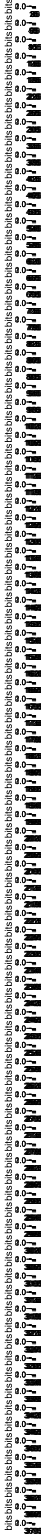

In [37]:
seqlogo.seqlogo(Pwm_pwm,  format = 'svg')

In [2]:
from pyjaspar import jaspardb

#Create the JASPAR2022 release object    
jdb_obj = jaspardb(release='JASPAR2024')

#Fetch motif by ID
motif = jdb_obj.fetch_motif_by_id('MA0095.2')
print(motif.name)

#Fetch motifs by TF name
motifs = jdb_obj.fetch_motifs_by_name('YY1')
print(len(motifs))

YY1
1


In [13]:
print(motifs[0].counts)

        0      1      2      3      4      5      6      7
A: 3123.00 41529.00 39666.00 30769.00 41506.00 689.00 561.00 1597.00
C: 33122.00 926.00 1447.00 2536.00 746.00 241.00 165.00 971.00
G: 3684.00 287.00 1320.00 8658.00 712.00 708.00 42263.00 39612.00
T: 3419.00 606.00 915.00 1385.00 384.00 41710.00 359.00 1168.00



In [15]:
from Bio import motifs

In [17]:
# Create a DataFrame
#df = pwm.to_numpy()

# Create a motif object
motif = motifs.create(pwm.to_numpy())

# Plot the PWM
motif.plot_pwm()

KeyError: '['